In [1]:
using PyPlot

In [2]:
e_rel = 1e-4
e_abs = 1e-4

0.0001

In [27]:
ε(ys...) = e_abs + e_rel * sum([abs(y) for y in ys])/length(ys)

ε (generic function with 1 method)

In [28]:
err(y, ŷ, ε) = sqrt(sum(((y - ŷ) / ε).^2)/length(y))

err (generic function with 1 method)

In [29]:
factor_min = 0.1
factor_max = 5
factor = 0.9
h_min = 1e-4

0.0001

In [30]:
h_opt(q, err, h) = max(h_min, 
                        h*min(factor_max,
                               max(factor_min, 
                                    err^(-1/(q+1)))))

h_opt (generic function with 1 method)

In [31]:
X0 = 0
XF = 10

Y0 = [1, 0]

2-element Array{Int64,1}:
 1
 0

In [32]:
ε_0 = ε(Y0)

norm(y) = sum((y/ε_0).^2)/length(y)

norm (generic function with 1 method)

In [33]:
G = 10.
L = 5.

f(x, y) = [-1*y[2]*G/L, y[1]]

f (generic function with 1 method)

In [34]:
euler_step(x, h, y) = y .+ f(x, y) * h

euler_step (generic function with 1 method)

In [35]:
function constant_step(method; step_size = 1e-4)
    return function(x, y)
        return (x + step_size, method(x, step_size, y))
    end
end

constant_step (generic function with 1 method)

In [42]:
function iterate(iteration_step)
    Xs = []
    Ys = []
    x = X0
    y = Y0
    while x < XF
        push!(Xs, x)
        push!(Ys, y)
        x, y = iteration_step(x, y)
    end
    return (Xs, Ys)
end

iterate (generic function with 1 method)

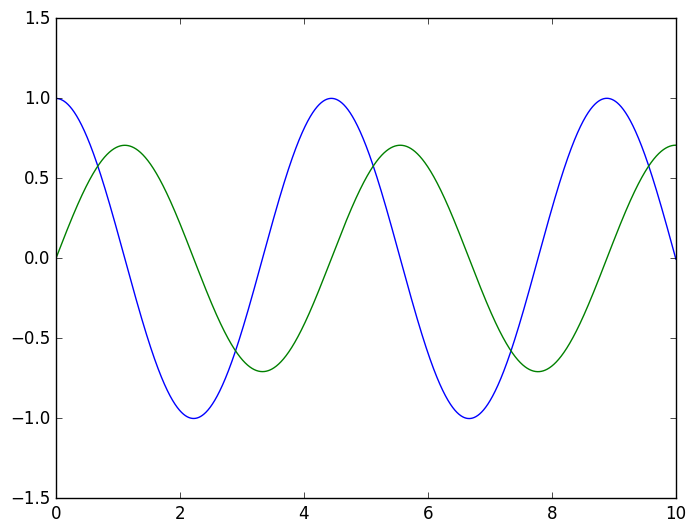

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4efd009978>
 PyObject <matplotlib.lines.Line2D object at 0x7f4efe32c0f0>

In [45]:
x, y = iterate(constant_step(euler_step))
plot(x, y)

In [ ]:
function adaptive_step(method)
    return function(x, y)
        return (x + step_size, method(x, step_size, y))
    end
end